In [22]:
import numpy as np 
from scipy.io import loadmat
transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

pi_t = [19.470, 35.554, 41.166, 30.108, 39.326]

pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors = np.array([pitime_n2*0.3278,pitime_n1*0.268,pitime_0*0.234,pitime_p1*0.268,pitime_p2*0.3278])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(pi_times)
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

def get_pulse_schedule(rabi_freqs, fractions):
    if len(rabi_freqs) != len(fractions):
        raise ValueError("rabi_freqs and fractions must have the same length.")
    
    times = []
    t_current = 0.0  # microseconds (start at time=0)
    
    for Omega, frac in zip(rabi_freqs, fractions):
        if not 0 <= frac <= 1:
            raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
        
        # Calculate the rotation angle and the pulse duration
        theta = 2.0 * np.arcsin(np.sqrt(frac))   # in radians
        t_pulse = theta / Omega if Omega > 0 else 0.0  # microseconds (if Omega in MHz)
        
        # The pulse starts at t_current, ends at t_current + t_pulse
        t_start = t_current
        t_end = t_current + t_pulse
        
        times.append((t_start, t_end))
        t_current = t_end  # next pulse starts after this one finishes
    
    return times

mat_data = loadmat('sensitivity_matrix_4p216G.mat')

matrix_sen_24x5 = mat_data['S']
matrix_sen_24x5[np.isnan(transition_strengths)] = np.nan

[[   0.          228.97092007  146.70807273  185.60393064  279.42733138]
 [ 171.19605312  328.00585366 1003.42125     283.58547619  113.96903571]
 [ 152.24422642  161.08434783  202.73344681  179.78214085    0.        ]
 [   0.            0.          116.87273617   76.05036758  117.61714286]
 [   0.          101.26522231  293.41614545  157.14264274   97.13019368]
 [ 132.48779856  127.06998425  104.81875952  369.32062016   68.47924893]
 [  69.38042992  342.8058363   165.71255652   59.64734579    0.        ]
 [  87.17505882   90.23174242   78.40621622    0.            0.        ]
 [   0.            0.            0.           45.82674298  886.69714286]
 [   0.            0.           56.34205769   52.09131052  232.11672289]
 [   0.           84.97734212   37.79364871  138.20436155  213.64286996]
 [ 168.95233028   40.18398406   55.32937392 3176.15733333  177.77899721]
 [  59.02665691   40.97339005  123.26613195  163.64784615    0.        ]
 [  42.98457831   54.04692002  602.10056604    0.  

In [23]:
def assign_states(transitions):
    unique_states = {}
    state_counter = 0

    # for path in transitions:
    for transition in transitions:
        from_state = (transition[0],)
        to_state = tuple(transition[1:])
        if from_state not in unique_states:
            unique_states[from_state] = state_counter
            state_counter += 1
        if to_state not in unique_states:
            unique_states[to_state] = state_counter
            state_counter += 1

    return unique_states

def translate_transitions(transitions, unique_states):
    all_couplings = []

    translated_path = []
    for transition in transitions:
        from_state = (transition[0],)
        to_state = tuple(transition[1:])
        translated_from = unique_states[from_state]
        translated_to = unique_states[to_state]
        translated_path.append((translated_from, translated_to))
        all_couplings.append((translated_from, translated_to))

    return all_couplings


In [24]:
# d = 4
# initial_state = [[-2, 3, -1]]

# pulse_train_U1 = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
# fractions_U1 = [0.25, 0.3333333333333333, 0.5]
# simulated_phase_mask_U1 = [0, 0, 0]
# fixed_phase_mask_U1 = [0, 0, 0]

# pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
# fractions_U2 = [0.5, 0.3333333333333333, 0.25]
# simulated_phase_mask_U2 = [3, 2, 1]
# fixed_phase_mask_U2 = [1, 1, 1]

# probe_trans = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

# d = 8
# initial_state = [[-1, 3, -1]]

# pulse_train_U1 = [[-1, 3, -1] ,[-1, 3, -1], [-1, 2, -2], [-2, 3, -1], [-1, 3, -1], [-1, 4, -2], [0, 3, -1], [0, 4, -1], [0, 3, -1], [0, 4, 0], [1, 3, -1], [-1, 3, -1], [-1, 3, -2]]
# fractions_U1 = [1, 0.125, 1, 0.1428571428571429, 0.16666666666666663, 1, 0.19999999999999996, 1, 0.25, 1, 0.33333333333333337, 0.5, 1]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

# pulse_train_U2 = [[-1, 3, -2], [-1, 3, -1], [-1, 3, -2], [1, 3, -1], [0, 4, 0], [0, 3, -1], [0, 4, 0], [0, 4, -1], [0, 3, -1], [0, 4, -1], [-1, 4, -2], [-1, 3, -1], [-1, 4, -2], [-2, 3, -1], [-1, 2, -2], [-1, 3, -1], [-1, 2, -2]]
# fractions_U2 = [1, 0.5, 1, 0.33333333333333337, 1, 0.25, 1, 1, 0.19999999999999996, 1, 1, 0.16666666666666663, 1, 0.1428571428571429, 1, 0.125, 1]
# simulated_phase_mask_U2 = [0, 7, 0, 6, 0, 5, 0, 0, 4, 0, 0, 3, 0, 2, 0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

# s12_state_shelvings = [[-2, 4, -4], [1, 4, 1]]

# probe_trans = [[-1, 3, -1], [0, 2, -2], [-2, 4, -4], [0, 4, -2], [1, 4, -1], [1, 4, 0], [1, 4, 1], [-2, 3, -2]]

# pulse_train_U2 = pulse_train_U2 + s12_state_shelvings
# fractions_U2 = fractions_U2 + [1 for i in range(len(s12_state_shelvings))]
# simulated_phase_mask_U2 = simulated_phase_mask_U2 + [0 for i in range(len(s12_state_shelvings))]
# fixed_phase_mask_U2 = fixed_phase_mask_U2 + [0 for i in range(len(s12_state_shelvings))]

# d = 5

initial_state = [[0,3,-1]]
pulse_train_U1 = [[0, 3, -1], [0, 4, 0], [0, 3, -1], [0, 4, -1], [1, 3, -1], [-1, 3, -1], [-1, 2, -2]]
fractions_U1 =  [0.2, 1, 0.25, 1, 0.3333333333333333, 0.5, 1]
simulated_phase_mask_U1 = [0,0, 0, 0, 0,0,0]
fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 1, 0]
probe_trans = [[0,4,-1],[-1,2,-2],[0,3,-1]]
pulse_train_U2 =  [[-1, 2, -2], [-1, 3, -1], [-1, 2, -2], [1, 3, -1], [0, 4, -1], [0, 3, -1], [0, 4, -1], [0, 4, 0], [0, 3, -1], [0, 4, 0], [1, 4, 1], [-1,2,-2]]
fractions_U2 = [1, 0.5, 1, 0.3333333333333333, 1, 0.25, 1, 1, 0.2, 1, 1, 1]
simulated_phase_mask_U2 = [0, 4, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0]
fixed_phase_mask_U2 = [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]


# initial_state = [[0,2,-2]]
# pulse_train_U1 = [[0,2,-2],[2,1,1]]
# fractions_U1 = [0.5, (np.sin((100/287.8736)*(np.pi/2)))**2]
# simulated_phase_mask_U1 = [0, 0]
# fixed_phase_mask_U1 = [0, 0]
# probe_trans = [[0,2,-2]]
# pulse_train_U2 =  [[0,2,-2]]
# fractions_U2 = [0.5]
# simulated_phase_mask_U2 = [1]
# fixed_phase_mask_U2 = [1]

full_pulse_train = pulse_train_U1 + pulse_train_U2
full_fractions = fractions_U1 + fractions_U2
full_fixed_phases = fixed_phase_mask_U1 + fixed_phase_mask_U2
full_simulated_phases = simulated_phase_mask_U1 + simulated_phase_mask_U2


In [25]:
pi_times_list = get_pi_times(full_pulse_train)
sens_list = get_pi_times(full_pulse_train,matrix_sen_24x5)
rabi_frequencis_list = np.pi/np.array(pi_times_list)
print(assign_states(full_pulse_train))
print(translate_transitions(full_pulse_train,assign_states(full_pulse_train)))

{(0,): 0, (3, -1): 1, (4, 0): 2, (4, -1): 3, (1,): 4, (-1,): 5, (2, -2): 6, (4, 1): 7}
[(0, 1), (0, 2), (0, 1), (0, 3), (4, 1), (5, 1), (5, 6), (5, 6), (5, 1), (5, 6), (4, 1), (0, 3), (0, 1), (0, 3), (0, 2), (0, 1), (0, 2), (4, 7), (5, 6)]


In [26]:
sens_list

[-0.09739998404256767,
 -1.3871685814592638,
 -0.09739998404256767,
 -2.4666051922395127,
 -0.7978644089234876,
 0.6040939933882328,
 -2.174974374611338,
 -2.174974374611338,
 0.6040939933882328,
 -2.174974374611338,
 -0.7978644089234876,
 -2.4666051922395127,
 -0.09739998404256767,
 -2.4666051922395127,
 -1.3871685814592638,
 -0.09739998404256767,
 -1.3871685814592638,
 -0.8994429845188279,
 -2.174974374611338]

In [27]:
rabi_frequencis_list

array([0.02548626, 0.05087682, 0.02548626, 0.0679194 , 0.01919727,
       0.07667397, 0.03481693, 0.03481693, 0.07667397, 0.03481693,
       0.01919727, 0.0679194 , 0.02548626, 0.0679194 , 0.05087682,
       0.02548626, 0.05087682, 0.0742932 , 0.03481693])

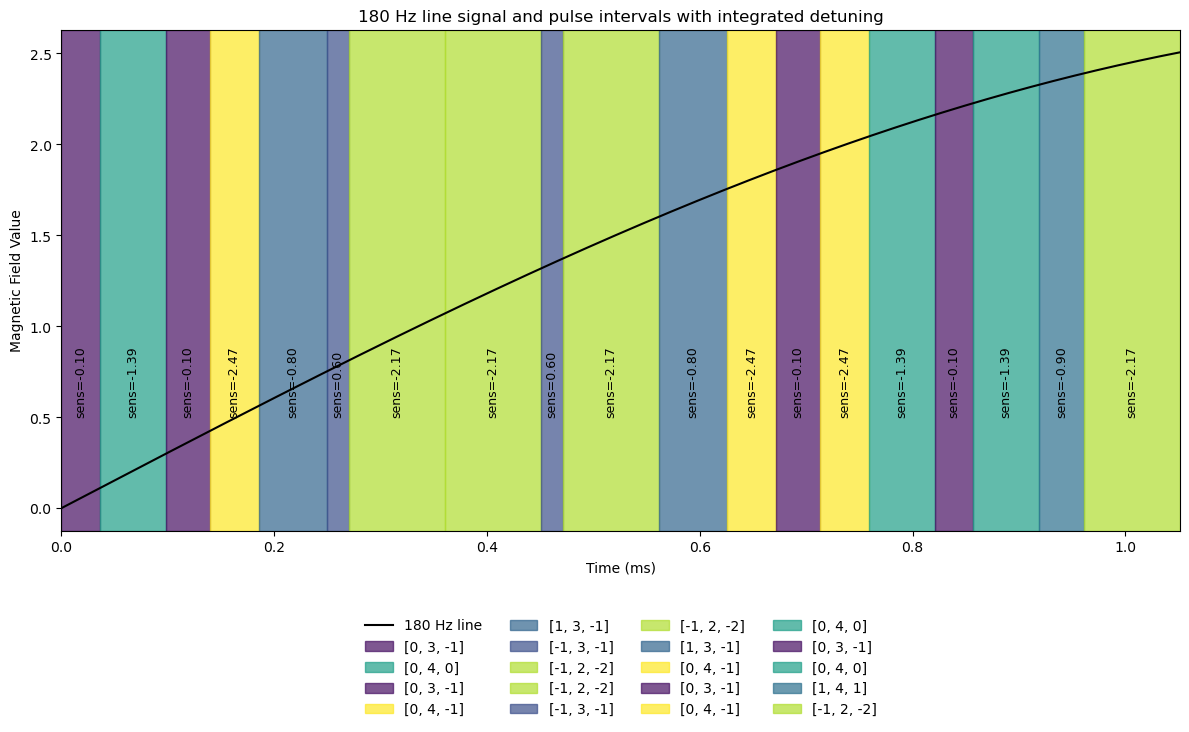

Midpoint line amplitudes for each pulse:
 [0.05554787074596454, 0.20518480920941096, 0.3613097442554787, 0.4929731355428307, 0.6575968873391325, 0.782087661526627, 0.9422488556005513, 1.1951101001073883, 1.3442538588851516, 1.4881298808351597, 1.6788572042699217, 1.807486497654863, 1.904308561235566, 1.9964859612569956, 2.1037101472038335, 2.1943429818932967, 2.2782201367916244, 2.3594774658760382, 2.451124731284955]
Integrated values up to pulse end times:
 [0.0, 1.990546279561604e-06, 1.4592297340939617e-05, 2.9514966278576354e-05, 5.232108901224365e-05, 9.423652992595178e-05, 0.00011039862600094864, 0.00019520449068874586, 0.00030321401433326727, 0.00033053987732940707, 0.0004644978198402812, 0.0005721333650899617, 0.0006557369024006364, 0.00073449487343192, 0.0008261589642461457, 0.0009566510929096826, 0.001035871807021757, 0.0011771965469754573, 0.0012764423823427998]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

def integrate_line_signal(times, signal):

    return np.trapz(signal, x=times)


schedule = get_pulse_schedule(rabi_frequencis_list, full_fractions)
pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]  # convert µs -> s

t_min = 0.0
t_max = max(max(pulses_sec))

fs = 100_000  # sample rate (points per second) to represent the line well
num_points = int(fs*(t_max - t_min)) if t_max > 0 else 1
if num_points < 2:
    num_points = 2  # at least 2 points

t_points = np.linspace(t_min, t_max, 3000)  # in seconds
A = 2.7  # amplitude
freq_line = 180.0  # Hz
line_signal = A * np.sin(2*np.pi * freq_line * t_points)

plt.figure(figsize=(12, 8))

plt.plot(t_points*1e3, line_signal, 'k-', label='180 Hz line')

norm_sens_list = np.abs(sens_list) / max(np.abs(sens_list))
cmap = viridis(norm_sens_list)

line_noise_amplitudes = []
integrated_values = []

for idx, (start_s, end_s) in enumerate(pulses_sec):
    plt.axvspan(start_s * 1e3, end_s * 1e3, color=cmap[idx], alpha=0.7,
                label=f'{full_pulse_train[idx]}')
    
    if end_s < t_min:
        continue
    if start_s > t_max:
        break

    mid_point_s = 0.5*(start_s + end_s)
    if (mid_point_s >= t_min) and (mid_point_s <= t_max):
        line_amp_mid = A * np.sin(2*np.pi*freq_line*mid_point_s)
    else:
        line_amp_mid = 0.0
    line_noise_amplitudes.append(line_amp_mid)
    

    mask = (t_points >= 0.0) & (t_points <= start_s)
    # print(mask)
    if np.any(mask):
        # print(t_points[mask],line_signal[mask])
        partial_integral = integrate_line_signal(t_points[mask], line_signal[mask])
    else:
        partial_integral = 0.0
    
    integrated_values.append(partial_integral)

    text_x_ms = mid_point_s*1e3  # ms
    text_y     = 0.5  # just above the max amplitude (which is ±1)
    label_str  = (f"sens={sens_list[idx]:.2f}")
    
    plt.text(text_x_ms, text_y, label_str,
             ha='center', va='bottom', fontsize=9,
             color='black', rotation=90)

# Final plot settings
plt.xlim(0, t_max*1e3 if t_max>0 else 1.0)
# plt.ylim(-1.2, 1.2)
plt.xlabel("Time (ms)")
plt.ylabel("Magnetic Field Value")
plt.title("180 Hz line signal and pulse intervals with integrated detuning")

# Put the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=4, fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ----------------------------------------------------------------
# 7) Results
# ----------------------------------------------------------------
print("Midpoint line amplitudes for each pulse:\n", line_noise_amplitudes)
print("Integrated values up to pulse end times:\n", integrated_values)


In [29]:
# ##### import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.cm import viridis

# # def line_signal(t, 
# #                 A1=0.000235, phi1=1.593,
# #                 A2=0.000247, phi2=-0.06,
# #                 offset=0.0001452):
# #     return (
# #         2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
# #         2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
# #         offset
# #     )*1000

# def line_signal(t, 
#                 A1=0.0003423806060810839, phi1=1.2893867862091697,
#                 A2=0.0005574657128318643, phi2=-1.2192683736729186,
#                 offset=0.00014702831939132153):
#     return (
#         2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
#         2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
#         offset
#     )*1000

# def integrate_line_signal(times, signal):
#     return np.trapz(signal, x=times)

# schedule = get_pulse_schedule(rabi_frequencis_list, full_fractions)
# pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]

# t_min = 0.0
# t_max = max(end for _, end in pulses_sec) if pulses_sec else 0.0

# fs = 100_000
# num_points = int(fs * (t_max - t_min)) if t_max > 0 else 1
# if num_points < 2:
#     num_points = 2

# t_points = np.linspace(t_min, t_max, 3000)
# line_signal_array = line_signal(t_points)

# plt.figure(figsize=(12, 8))
# plt.plot(t_points * 1e3, line_signal_array, 'k-', label='Line Signal')

# norm_sens_list = np.abs(sens_list) / max(np.abs(sens_list))
# cmap = viridis(norm_sens_list)

# line_noise_amplitudes = []
# integrated_values = []

# for idx, (start_s, end_s) in enumerate(pulses_sec):
#     plt.axvspan(
#         start_s * 1e3, 
#         end_s * 1e3,
#         color=cmap[idx], 
#         alpha=0.7,
#         label=f'{full_pulse_train[idx]}'
#     )
    
#     if end_s < t_min:
#         continue
#     if start_s > t_max:
#         break

#     mid_point_s = 0.5 * (start_s + end_s)
#     if t_min <= mid_point_s <= t_max:
#         line_amp_mid = line_signal(mid_point_s)
#     else:
#         line_amp_mid = 0.0
#     line_noise_amplitudes.append(line_amp_mid)

#     mask = (t_points >= 0.0) & (t_points <= start_s)
#     if np.any(mask):
#         partial_integral = integrate_line_signal(t_points[mask], line_signal(t_points[mask]))
#     else:
#         partial_integral = 0.0
#     integrated_values.append(partial_integral)

#     text_x_ms = mid_point_s * 1e3
#     text_y = np.mean(line_signal_array)
#     label_str = f"sens={sens_list[idx]:.2f}"
#     plt.text(
#         text_x_ms, 
#         text_y, 
#         label_str,
#         ha='center', 
#         va='bottom', 
#         fontsize=9,
#         color='black', 
#         rotation=90
#     )

# plt.xlim(0, t_max * 1e3 if t_max > 0 else 1.0)
# plt.xlabel("Time (ms)")
# plt.ylabel("Line amplitude")
# plt.title("Line Signal and Pulse Intervals with Integrated Detuning")
# plt.legend(
#     loc='upper center', 
#     bbox_to_anchor=(0.5, -0.15),
#     ncol=4, 
#     fontsize=10, 
#     frameon=False
# )
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

# print("Midpoint line amplitudes for each pulse:\n", line_noise_amplitudes)
# print("Integrated values up to pulse end times:\n", integrated_values)


In [30]:
detunings = np.array(integrated_values)*1e3 * np.array(sens_list)
print(detunings)

[-0.00000000e+00 -2.76122326e-03 -1.42128953e-03 -7.28017691e-02
 -4.17451348e-02  5.69277217e-02 -2.40114183e-01 -4.24564765e-01
  1.83169765e-01 -7.18915763e-01 -3.70606278e-01 -1.41122713e+00
 -6.38687638e-02 -1.81170887e+00 -1.14602176e+00 -9.31778012e-02
 -1.43692883e+00 -1.05882118e+00 -2.77622947e+00]


8
[array([1.20132560e-33, 6.74260638e-01, 7.84000964e-02, 2.07458597e-01,
       1.58754048e-33, 9.57558999e-03, 1.59347010e-32, 3.03050789e-02]), array([1.04340875e-33, 3.04909060e-01, 6.22179473e-02, 1.04637310e-01,
       6.72537680e-33, 3.99852768e-01, 2.44507937e-31, 1.28382915e-01]), array([1.42118229e-33, 5.86595438e-02, 3.26231787e-01, 1.78380215e-01,
       2.21015855e-32, 1.48240680e-02, 9.91843521e-33, 4.21904386e-01]), array([1.49612572e-33, 3.75156165e-02, 3.48164862e-01, 1.19323862e-01,
       7.69181209e-33, 3.48164146e-01, 2.22229247e-31, 1.46831514e-01]), array([1.08979250e-33, 7.25068693e-02, 3.70868408e-01, 6.52639910e-02,
       2.01496006e-32, 1.06718423e-01, 5.78049428e-32, 3.84642309e-01]), array([1.32105519e-33, 1.10221976e-02, 2.71351348e-01, 1.25828538e-01,
       1.91022999e-32, 2.27147874e-01, 1.54510742e-31, 3.64650043e-01]), array([1.80608630e-33, 2.92693450e-01, 5.28885687e-02, 3.67858618e-01,
       2.32062140e-33, 2.42260264e-01, 1.37187595e-31, 4.42991

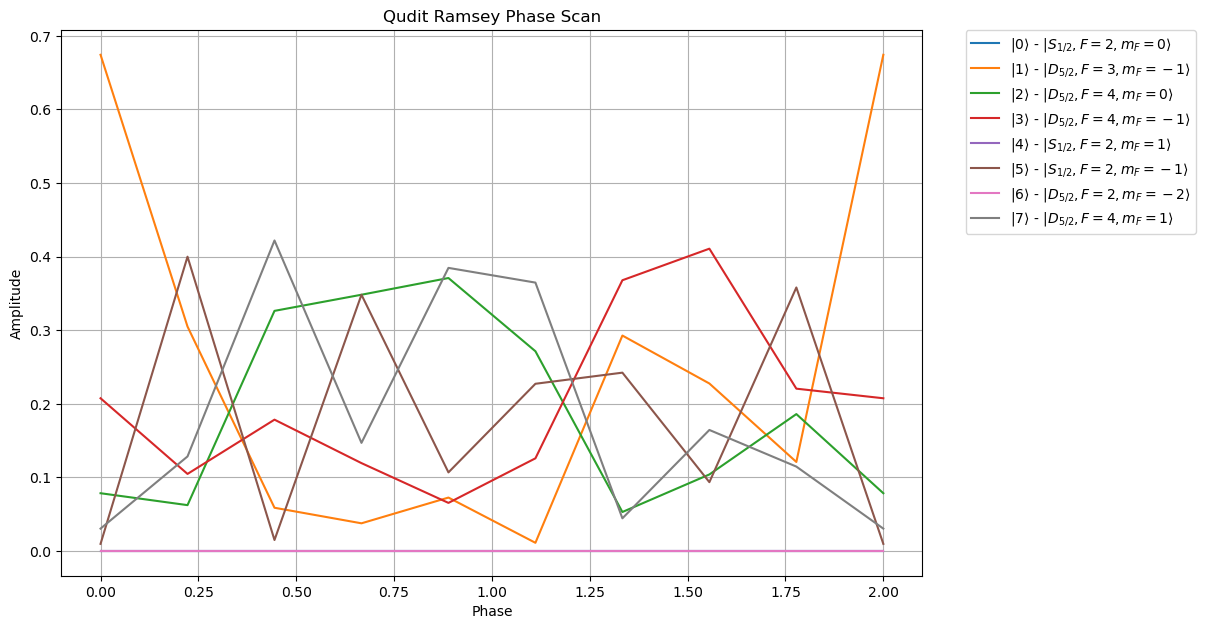

In [55]:
import numpy as np
from scipy.linalg import expm

state_mapping = assign_states(full_pulse_train)
couplings = translate_transitions(full_pulse_train,assign_states(full_pulse_train))
# print(couplings)
rabi_freqs = rabi_frequencis_list
fractions  = full_fractions

fixed_phase_flags = full_fixed_phases

sim_phase_flags   = full_simulated_phases

dim = max(max(pair) for pair in couplings) + 1
# dim = max(max(couplings))+1
print(dim)
detunings_in_mhz = np.zeros(len(couplings))
phase_180Hz = np.array(integrated_values)*1e3 * np.array(sens_list)
# detunings_in_mhz = np.array([0.001,0.001,0.001,0.001,0.001,0.001])

def coupling_operator_with_phase(i, j, dim, phi):

    op = np.zeros((dim, dim), dtype=complex)
    op[i, j] = np.exp(+1j * phi)
    op[j, i] = np.exp(-1j * phi)
    return op

def pulse_duration_for_fraction(f, Omega):

    if not (0 <= f <= 1):
        raise ValueError("Fraction f must be between 0 and 1.")
    theta = 2.0 * np.arcsin(np.sqrt(f))
    return theta / Omega if Omega != 0 else 0.0

def simulate_sequence(couplings, rabi_freqs, fractions,
                      fixed_phase_flags, sim_phase_flags,phase_180Hz,
                      detunings_in_mhz,
                      dim=4, sweeping_phase=0.0):

    state = np.zeros(dim, dtype=complex)
    state[1] = 1.0

    accumulated_phase = 0.0
    list_accumulated_phase = []
    for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_in_mhz
    ):
        i, j = levels

        phi_fixed = fix_pflag * np.pi
        phi_scan  = sim_pflag * sweeping_phase

        total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase

        H_op = coupling_operator_with_phase(i, j, dim, total_phase)
        H_coupling = 0.5 * Omega * H_op

        t_pulse = pulse_duration_for_fraction(frac, Omega)  
        
        # Evolve the state
        U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
        state = U @ state
        list_accumulated_phase.append(accumulated_phase)
        accumulated_phase += 2*np.pi* Delta_mhz * t_pulse
        
    return state,list_accumulated_phase

num_points = 10
phase_sweep = np.linspace(0, 2*np.pi, num_points)
all_populations = []

for ph in phase_sweep:
    final_state,phase_acc = simulate_sequence(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz,
        detunings_in_mhz,
        dim=dim,
        sweeping_phase=ph
    )
    pops = np.abs(final_state)**2
    all_populations.append(pops)
print(all_populations)
plt.figure(figsize = (12,6))
states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
for i in range(dim):
    plt.plot(phase_sweep/np.pi,np.array(all_populations)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Qudit Ramsey Phase Scan")
plt.grid()
plt.show()

In [56]:
fs,_ = simulate_sequence(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz,
        detunings_in_mhz,
        dim=dim,
        sweeping_phase=0
    )
pops = np.abs(fs)**2
print(pops)

[1.20132560e-33 6.74260638e-01 7.84000964e-02 2.07458597e-01
 1.58754048e-33 9.57558999e-03 1.59347010e-32 3.03050789e-02]


### Monte-Carlo

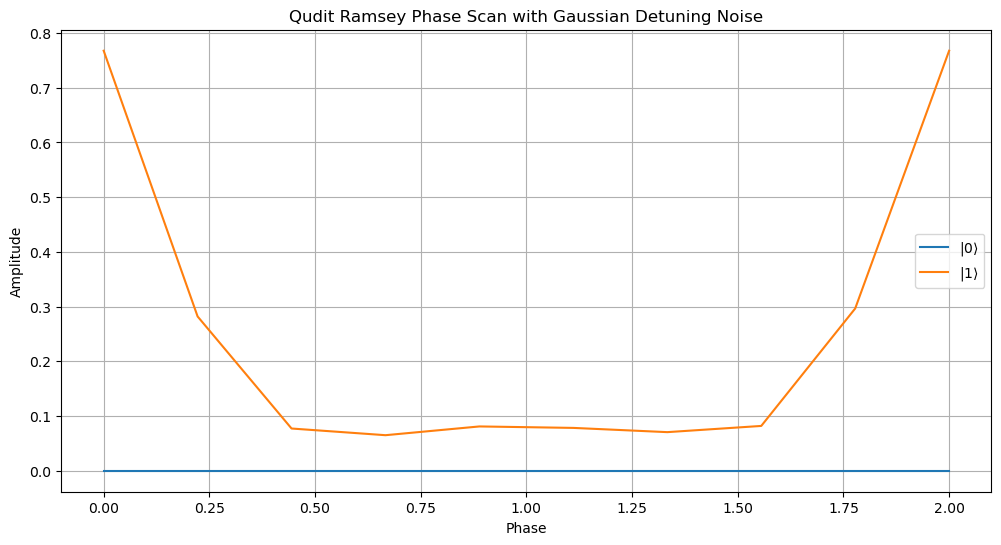

In [60]:

import numpy as np
import matplotlib.pyplot as plt

# Define noise parameters
num_shots = 100  # Number of Monte Carlo runs
noise_mean = 0.0  # Mean of the Gaussian noise in MHz
noise_std = 0.001  # Standard deviation of the noise in MHz

# Initialize storage for averaged populations
all_populations_mc = np.zeros((num_points, dim))

for _ in range(num_shots):
    # Generate random detunings for each coupling using Gaussian sampling
    detunings_sampled = [np.random.normal(noise_mean, noise_std, size=len(couplings))]
    # print(detunings_sampled)
    # print(len(couplings), len(rabi_freqs), fractions,
    #         fixed_phase_flags, sim_phase_flags, phase_180Hz,
    #         detunings_sampled[0], dim, ph)
    # Run the phase sweep simulation with sampled detunings
    all_populations = []
    for ph in phase_sweep:
        final_state, _ = simulate_sequence(
            couplings, rabi_freqs, fractions,
            fixed_phase_flags, sim_phase_flags, phase_180Hz*0,
            detunings_sampled[0], dim=dim, sweeping_phase=ph
        )
        pops = np.abs(final_state) ** 2
        all_populations.append(pops)
        # print(pops)
    # Accumulate results over Monte Carlo runs
    all_populations_mc += np.array(all_populations)

# Average over all shots
all_populations_mc /= num_shots

# Plot the results
plt.figure(figsize=(12, 6))
for i in range(dim)[:2]:
    plt.plot(phase_sweep / np.pi, all_populations_mc[:, i], label=rf'$|{i} \rangle$')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Qudit Ramsey Phase Scan with Gaussian Detuning Noise")
plt.grid()
plt.show()



In [ ]:
np.fill(0.001)